In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
import math
pd.set_option('float_format', '{:f}'.format)
%matplotlib inline

In [2]:
queens=pd.read_csv('queens_clean.csv', low_memory=False)
brooklyn=pd.read_csv('brooklyn_clean.csv', low_memory=False)

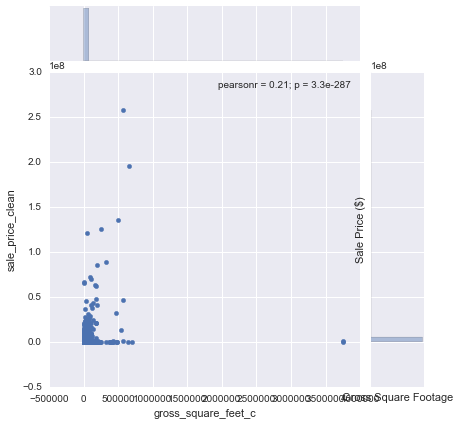

In [3]:
sns.jointplot('gross_square_feet_c', 'sale_price_clean', kind='scatter', data=queens)
plt.xlabel('Gross Square Footage')
plt.ylabel('Sale Price ($)')
plt.show()

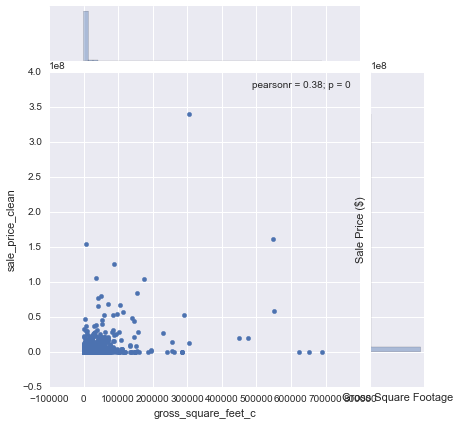

In [4]:
sns.jointplot('gross_square_feet_c', 'sale_price_clean', kind='scatter', data=brooklyn)
plt.xlabel('Gross Square Footage')
plt.ylabel('Sale Price ($)')
plt.show()

The relationship between square feet and price in Queens is very loose (Pearson Correlation Coefficient=0.21) but it is statisically significant with extremely small p value.


In [5]:
queens_sales=queens['sale_price_clean'].sort_values()

In [6]:
print(queens_sales.head())

52135   1.000000
18149   1.000000
62460   1.000000
43329   1.000000
23830   1.000000
Name: sale_price_clean, dtype: float64


In [7]:
brooklyn_sales=brooklyn.sale_price_clean.sort_values()

In [8]:
queens_bin_vals=np.arange(start=queens_sales.min(), stop=queens_sales.max(), step=.05)

MemoryError: 

In [28]:
queens_03=queens[queens['year']==2003].dropna()

In [24]:
queens_16=queens[queens['year']==2016].dropna()

In [25]:
t_stat,p=stats.ttest_ind(queens_03['sale_price_clean'], queens_16['sale_price_clean'], equal_var=False)

In [26]:
print('T-Stat:', t_stat)

T-Stat: -13.000650331287613


In [30]:
print('P-Value:', p)

P-Value: 2.2541363988585703e-38
